In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

-문제 1 실행

In [23]:
diabetes=datasets.load_diabetes()

data = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['target'])

-diabetes 데이터를 가져온다.

-target에 대한 10개 속성의 상관계수를 heatmap으로 표현한다.

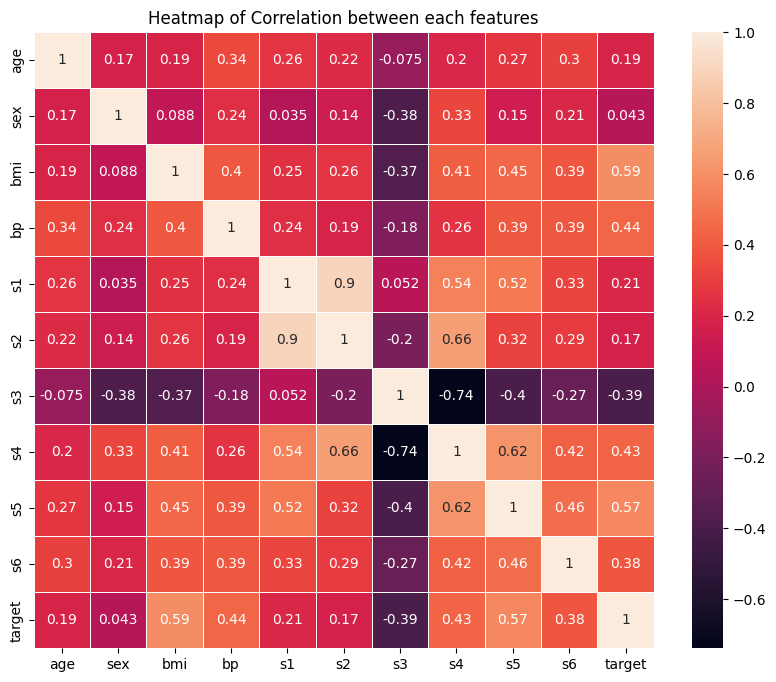

In [24]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title("Heatmap of Correlation between each features")
plt.show()

-당뇨 수치에 상관계수가 높은 6개의 속성을 선택한다.

In [92]:
x=data[['bmi','s5','bp','s4','s3','s6']]

y=data['target']
print(x)

          bmi        s5        bp        s4        s3        s6
0    0.061696  0.019907  0.021872 -0.002592 -0.043401 -0.017646
1   -0.051474 -0.068332 -0.026328 -0.039493  0.074412 -0.092204
2    0.044451  0.002861 -0.005670 -0.002592 -0.032356 -0.025930
3   -0.011595  0.022688 -0.036656  0.034309 -0.036038 -0.009362
4   -0.036385 -0.031988  0.021872 -0.002592  0.008142 -0.046641
..        ...       ...       ...       ...       ...       ...
437  0.019662  0.031193  0.059744 -0.002592 -0.028674  0.007207
438 -0.015906 -0.018114 -0.067642  0.034309 -0.028674  0.044485
439 -0.015906 -0.046883  0.017293 -0.011080 -0.024993  0.015491
440  0.039062  0.044529  0.001215  0.026560 -0.028674 -0.025930
441 -0.073030 -0.004222 -0.081413 -0.039493  0.173816  0.003064

[442 rows x 6 columns]


-학습 데이터와 테스트 데이터를 8:2로 분리해 선형회귀를 진행한다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

regr=LinearRegression()
regr.fit(X_train,y_train)

-선형회귀 결과의 각 계수와 절편을 구한다.

In [122]:
y_pred=regr.predict(X_test)

score1=regr.score(X_train,y_train)
score2=regr.score(X_test,y_test)

print(regr.coef_)

print(regr.intercept_)

[ 554.27511781  533.79614689  249.081933   -177.677942   -288.91568177
   96.18053197]
152.565645565603


-학습 데이터와 테스트 데이터에 대한 회귀 점수를 각각 구한다.

In [121]:
print(score1)
print(score2)

0.5016330622515508
0.4576599397406256


-테스트 데이터에 대한 mean squared error를 구한다.

In [126]:
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('MSE=', mse)

MSE= 54.82117083586072


-테스트 데이터에 대한 예측 분포를 scatter 그래프로 그린다. (파란색 점)
선형회귀 직선(검정색) 을 함께 그려 오차의 정도를 확인할 수 있게 한다.

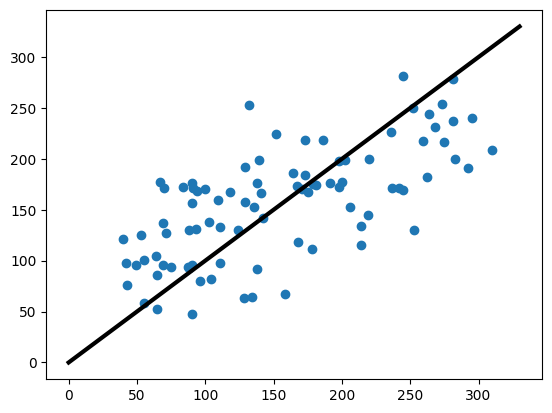

In [125]:
plt.scatter(y_test,y_pred)
x=np.linspace(0,330,100)
plt.plot(x,x,linewidth=3,color='black')
plt.show()

-상관계수가 낮은 4개의 속성을 다시 선택해 앞에서 실행한 선형회귀 과정을 반복한다.

In [127]:
x=data[['age','sex','s1','s2']]
y=data['target']
print(x)

          age       sex        s1        s2
0    0.038076  0.050680 -0.044223 -0.034821
1   -0.001882 -0.044642 -0.008449 -0.019163
2    0.085299  0.050680 -0.045599 -0.034194
3   -0.089063 -0.044642  0.012191  0.024991
4    0.005383 -0.044642  0.003935  0.015596
..        ...       ...       ...       ...
437  0.041708  0.050680 -0.005697 -0.002566
438 -0.005515  0.050680  0.049341  0.079165
439  0.041708  0.050680 -0.037344 -0.013840
440 -0.045472 -0.044642  0.016318  0.015283
441 -0.045472 -0.044642  0.083740  0.027809

[442 rows x 4 columns]


-학습 데이터와 테스트 데이터를 8:2로 분리해 선형회귀를 수행한다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

regr=LinearRegression()
regr.fit(X_train,y_train)

-선형회귀 결과의 각 계수 및 절편,학습 및 테스트 데이터의 회귀 점수를 구한다.

In [141]:
y_pred=regr.predict(X_test)

score1=regr.score(X_train,y_train)
score2=regr.score(X_test,y_test)

print(score1)
print(score2)

print(regr.coef_)
print(regr.intercept_)

0.06616931083208466
0.029638866534928976
[ 167.62368095    3.7261965   517.26076506 -195.03811049]
154.48815066365617


-테스트 데이터에 대한 mean squared error를 구하고 테스트 데이터에 대한 예측 분포를 scatter 그래프로 그린다.

In [139]:
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print('MSE=', mse)

MSE= 74.22652481086774


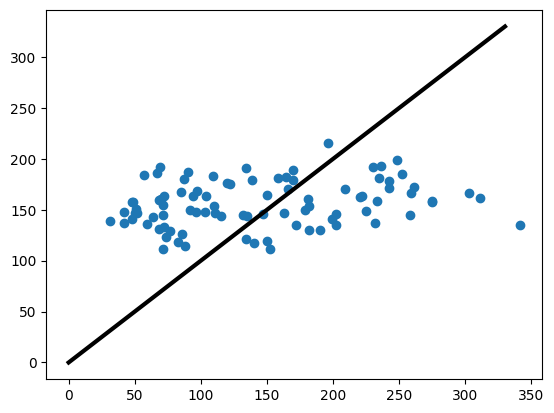

In [140]:
plt.scatter(y_test,y_pred)
x=np.linspace(0,330,100)
plt.plot(x,x,linewidth=3,color='black')
plt.show()

-위의 두 결과를 비교하면 당뇨 수치에 대한 상관계수가 높은 상위 6개의 속성을 사용해 선형회귀를 수행했을 때가 하위 4개의 속성을 사용해 선형회귀를 진행했을 때보다 회귀 점수가 우수하며, 평균제곱오차의 값 또한 낮음을 알 수 있다. 그래프를 통해서도 전자의 경우가 후자의 경우보다 테스트 데이터에 대한 예측 분포와 선형회귀 직선간의 오차가 작음을 확인할 수 있다.

-문제 2 실행

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

-breast_cancer 데이터를 불러온다.

In [ ]:
cancer=datasets.load_breast_cancer(as_frame=True)

data=cancer.frame
print(data)

breast_cancer에서 아래와 같은 13개의 속성을 선택한다.

In [143]:
x=data[['worst smoothness','mean concave points', 'worst concave points','worst symmetry','mean concavity','worst concavity','worst radius','worst texture','area error','mean texture','texture error','mean compactness','compactness error']]

y=data['target']

-13개 속성의 히트맵을 그린다.

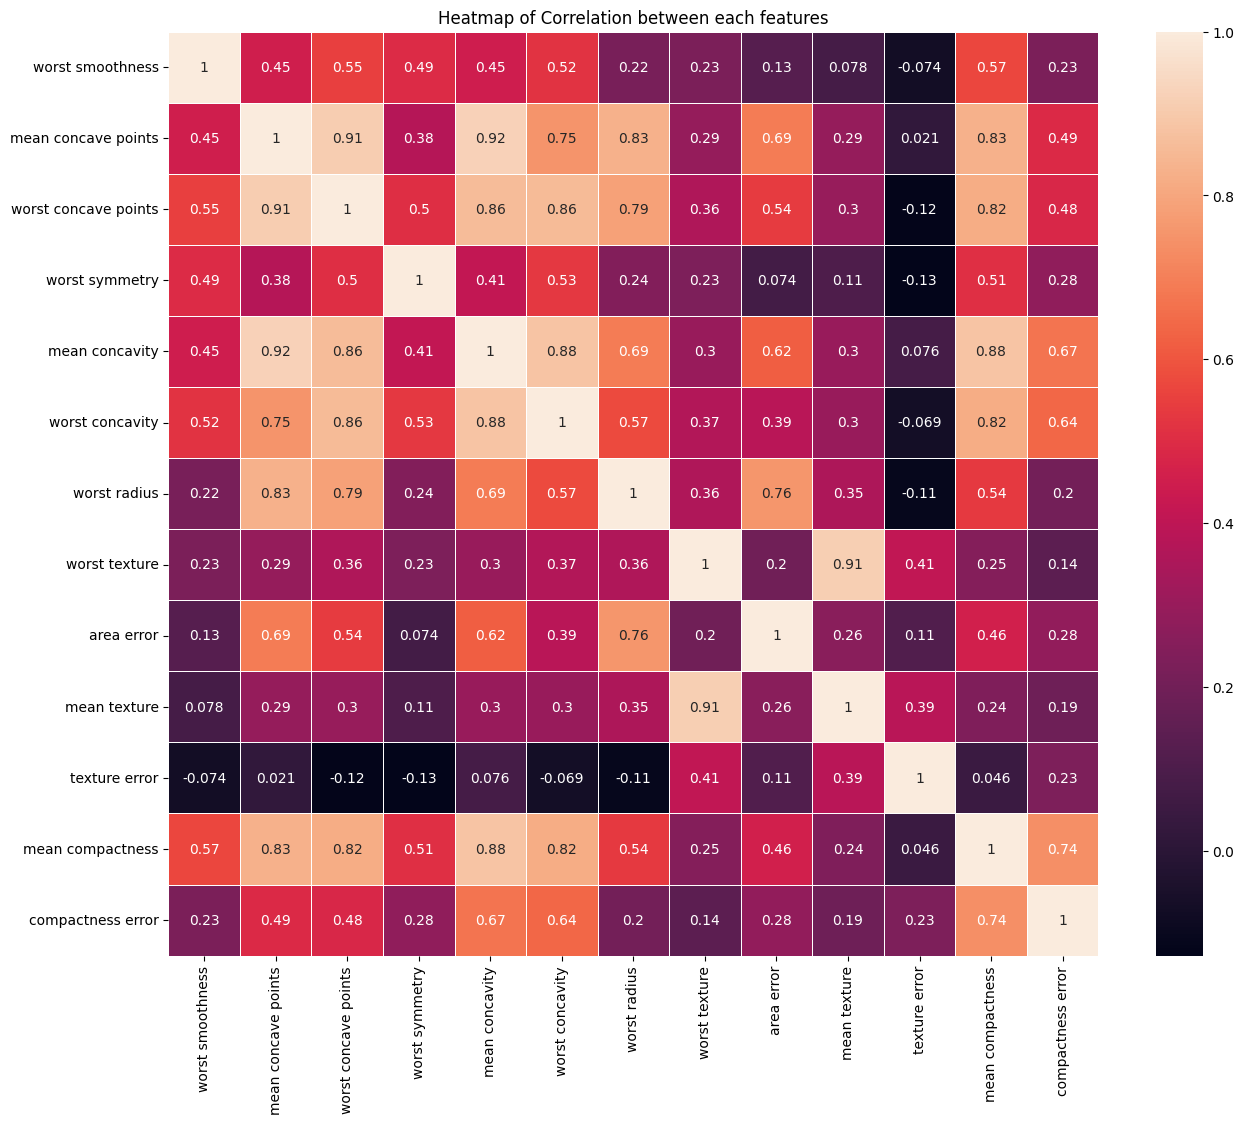

In [231]:
data_corr=x.corr()
plt.figure(figsize=(15,12))
sns.heatmap(data_corr, annot=True, linewidths=0.5)
plt.title("Heatmap of Correlation between each features")
plt.show()

-학습 데이터와 테스트 데이터를 8:2로 분리한다.

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(114, 13)
(455,)
(114,)


-분리한 각 데이터를 표준화한다.

In [219]:
scalerX=StandardScaler()
scalerX.fit(X_train)

X_train_std=scalerX.transform(X_train)
print(X_train_std)

X_test_std=scalerX.transform(X_test)
print(X_test_std)

[[-0.27563463 -0.11061219  0.04331244 ...  0.18791309 -0.36690518
  -0.59035261]
 [ 0.42631228  1.22472544  1.98929435 ... -0.62856682  2.28782994
   2.11830845]
 [ 0.3989637  -0.80334097 -0.75738903 ...  0.72488976 -0.72108885
  -0.90667835]
 ...
 [ 1.42909358 -1.02174615 -1.32264326 ...  1.7162313  -0.27956692
   0.36928731]
 [-0.56735282 -0.5340743   0.30408306 ... -0.7493374   0.35170316
   2.37283659]
 [-1.41515883 -0.64965695 -1.02358609 ...  0.01088781 -0.5239981
   0.21851951]]
[[-1.4561817  -0.58138136 -0.23253163 ... -0.08155872 -1.03469501
  -0.84832032]
 [-0.46707469 -0.96495211 -0.87601705 ...  0.46328574 -0.99643622
  -0.92112455]
 [-0.68130524 -0.67752976 -0.43602315 ... -0.333328   -0.69191169
  -0.40060302]
 ...
 [ 1.47923265  2.62833867  2.25307965 ...  0.78783208  3.34091287
   2.08677906]
 [ 1.36072213 -0.45250159  0.40959718 ... -1.15590545  0.18746086
  -0.61614938]
 [ 1.49746504  0.2719357   0.60404464 ...  0.35903752  1.16711783
   0.29304352]]


-k:1~15까지 변경하며 fitting graph를 그린다.

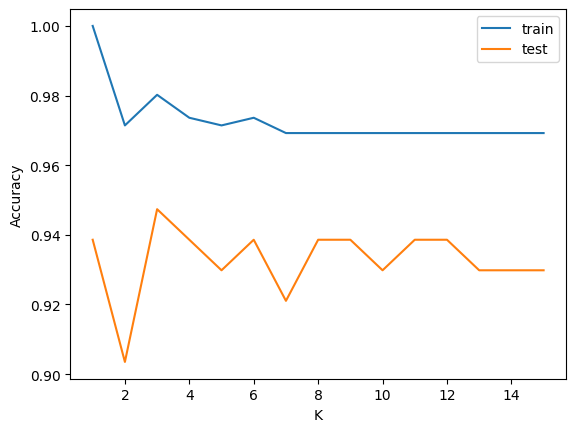

In [220]:
train_accuracy=[]
test_accuracy=[]

neighbors=range(1,16)
for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_std,y_train)

  score=knn.score(X_train_std,y_train)
  train_accuracy.append(score)

  score=knn.score(X_test_std,y_test)
  test_accuracy.append(score)

plt.plot(neighbors,train_accuracy,label="train")
plt.plot(neighbors,test_accuracy,label="test")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

-k의 값에 따른 테스트 데이터의 분류 정확도를 확인한다.

In [221]:
test_accuracy

[0.9385964912280702,
 0.9035087719298246,
 0.9473684210526315,
 0.9385964912280702,
 0.9298245614035088,
 0.9385964912280702,
 0.9210526315789473,
 0.9385964912280702,
 0.9385964912280702,
 0.9298245614035088,
 0.9385964912280702,
 0.9385964912280702,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088]

-분류 정확도가 가장 높은 k값(3) 을 선택해 knn 모델을 구성하고, 테스트 데이터로 예측한 클래스에 대한 confusion matrix와 score를 구한다.


In [225]:
K=3
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train_std,y_train)

y_pred=knn.predict(X_test_std)
print(y_pred)

cf=confusion_matrix(y_test,y_pred)
print(cf)

knn.score(X_test_std,y_test)

[1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1
 0 1 0]
[[40  5]
 [ 1 68]]


0.9473684210526315

-위에서 적용한 속성으로 gini계수를 사용한 decision tree를 그린다.

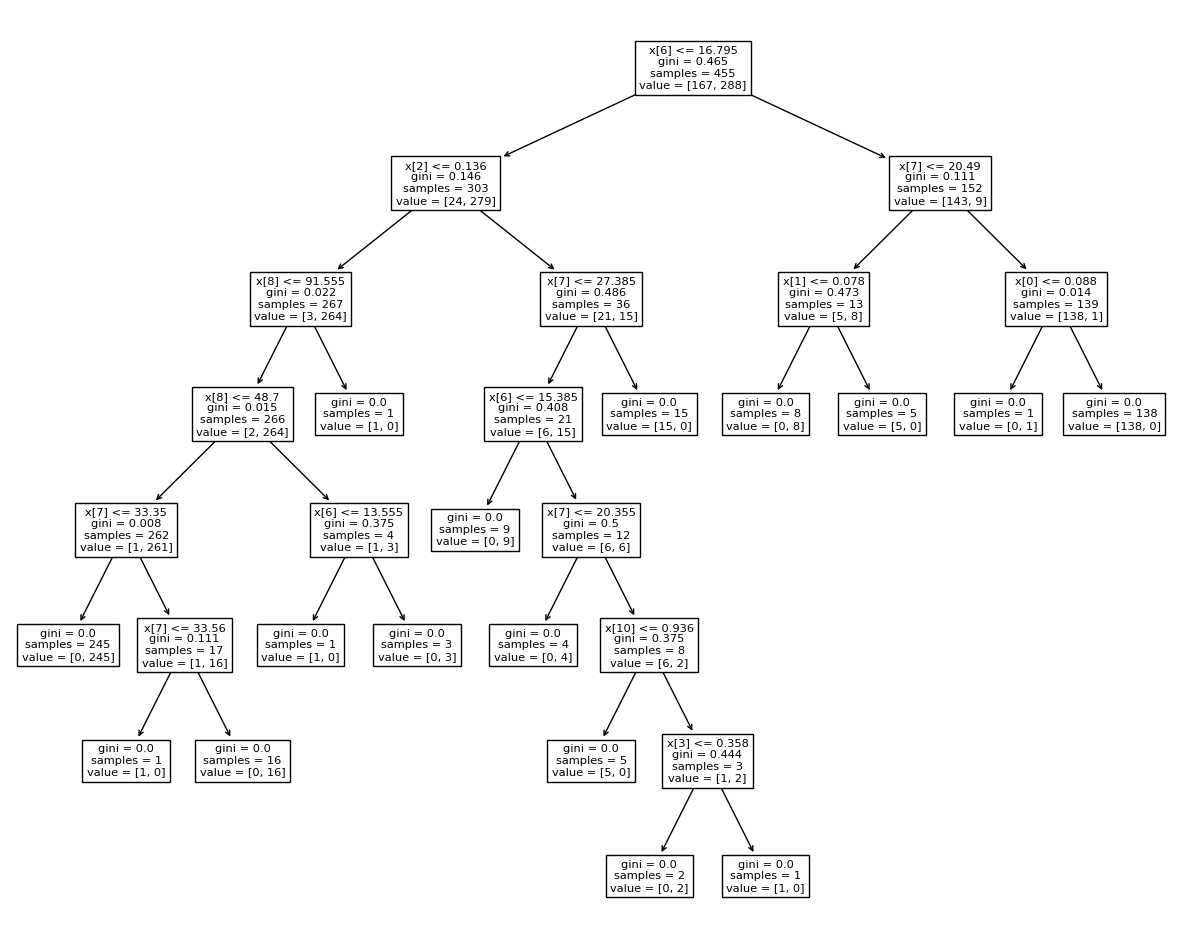

In [230]:
clf=tree.DecisionTreeClassifier(criterion="gini")
clf=clf.fit(X_train,y_train)

plt.figure(figsize=(15,12))
tree.plot_tree(clf)
plt.show()

-테스트 데이터로 예측한 클래스에 대한 confusion matrix와 accuracy score를 구한다.

In [232]:
y_pred=clf.predict(X_test)
print(y_pred)

print(confusion_matrix(y_test,y_pred))
print("정확도",accuracy_score(y_test,y_pred))

[1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1
 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1
 0 1 0]
[[40  5]
 [ 3 66]]
정확도 0.9298245614035088


-위 두 결과를 비교하면 knn을 사용했을 때와 decision tree를 사용했을 때의 정확도는 큰 차이 없이 모두 90% 정도의 값을 가진다는 것을 알 수 있다.